# Data Exploration 

In [260]:
import pandas as pd

df = pd.read_json('data/tweets_2024-03-07_22-02-24.json', lines=True)
# Convert 'date' column to datetime with the correct format
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
# Save CSV
df.to_csv('data/dataset.csv', index=False) 

In [248]:
df.date.min(), df.date.max()

(Timestamp('2023-10-01 00:00:00'), Timestamp('2024-03-07 00:00:00'))

In [249]:
df.sample(7)

,text,author_name,author_handle,date,lang,url,mentioned_urls,is_retweet,media_type,images_urls,num_reply,num_retweet,num_like
34,今天刷到Sun Yuzhen的视频，感慨里面提到的一个小小的过滤器—— 『在问我怎么做视频之前，你自己先发20个视频，哪怕一个只有5秒钟。』\n然而这个极其简单的过滤器，绝大多数人都通不过。这可能也是『只筛选，不培养』这句话现在这么流行的原因。\n\nhttps://youtube.com/watch?v=kMqd6Tc4X_0…\n\n#typefully Day 3/30,Yucheng L - /acc,@lyc_zh,2024-03-04,zh,https://twitter.com/lyc_zh/status/1764483531013861709,[https://t.co/NyrQd7zftK],False,No media,None,6,2,0
324,,celestialmaze,@cmzw_,2024-01-24,,https://twitter.com/cmzw_/status/1750091321619124250,[],False,Video,None,19,487,0
982,,木澄 玲生,@kisumirei41,2023-11-25,qme,https://twitter.com/kisumirei41/status/1728415540514025825,[],False,Image,[https://pbs.twimg.com/media/F_yQu4wa4AArlo4?format=jpg&name=medium],2,339,0
84,#Frieren \n#fern\n#フリーレン\n#フェルン,TKC,@colin_5683,2024-02-27,qme,https://twitter.com/colin_5683/status/1762320555708129589,[],False,Image,[https://pbs.twimg.com/media/GHUFMUqbYAENcDt?format=jpg&name=medium],20,2643,0
727,风口变了…..\n12月14日凌晨，美联储议息会议结果出来了：\n维持联邦基金目标利率在5.25%-5.50%区间，每月缩减600亿美元国债和350亿美元MBS。\n与市场预期一致。\n \n可以说，关于美联储加息这事儿，自7月份议息会议结束以来，美联储基本上就是在一步步确认市场预期。…,财经数据库,@caijingshujuku,2023-12-20,zh,https://twitter.com/caijingshujuku/status/1737483779034284237,[],False,Image,"[https://pbs.twimg.com/media/GBzISGUWwAAaeNG?format=jpg&name=small, https://pbs.twimg.com/media/GBzISGMWUAA_0GY?format=jpg&name=small, https://pbs.twimg.com/media/GBzISGHXoAAGlQz?format=jpg&name=small, https://pbs.twimg.com/media/GBzISGKWkAAf6tK?format=jpg&name=small]",1,15,0
155,试了猎豹前首席科学家闵可锐做的这个密塔AI搜索，相当可以啊，某些方面比Perplexity还要好。\n\n尤其是研究能力开启以后直接生成的内容比一些媒体写的报告好多了，非常全面逻辑性也很强。…,歸藏,@op7418,2024-02-18,zh,https://twitter.com/op7418/status/1759128155225473202,[],False,Image,"[https://pbs.twimg.com/media/GGmscMNagAAZPJh?format=jpg&name=900x900, https://pbs.twimg.com/media/GGmssQnaoAAeDT9?format=jpg&name=900x900]",28,110,0
869,"Generative Powers of Ten\n\nabs: https://arxiv.org/abs/2312.02149\nproject page: https://powers-of-10.github.io\n\n""We present a method that uses a text-to-image model to generate consistent content across multiple image scales, enabling extreme semantic zooms into a scene""","Tanishq Mathew Abraham, Ph.D.",@iScienceLuvr,2023-12-05,en,https://twitter.com/iScienceLuvr/status/1731875267889578425,"[https://t.co/GLSH7IbK3a, https://t.co/DhLYj3lWLX]",False,Video,None,18,85,0


In [250]:
df.author_name.value_counts().head(5)

歸藏        42
宝玉        32
财经数据库     24
toyxyz    18
-Zho-     15
Name: author_name, dtype: int64

## Plots
Few basic plots.

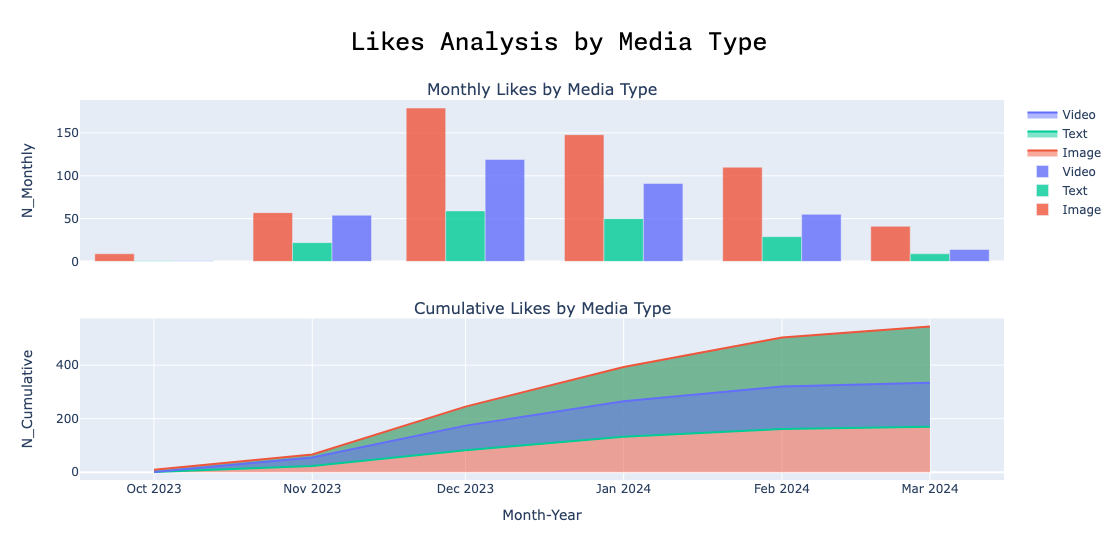

In [251]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

def plot_likes_with_cumulative(df, start_date, end_date):
    df['date'] = pd.to_datetime(df['date'])
    df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    df['media_type'] = df['media_type'].replace({'No media': 'Text'})
    df['year_month'] = df['date'].dt.strftime('%Y-%m')

    # Prepare the monthly count DataFrame
    monthly_likes_df = df.groupby(['year_month', 'media_type']).size().reset_index(name='counts')

    # Prepare the cumulative DataFrame
    cumulative_likes_df = monthly_likes_df.copy()
    cumulative_likes_df['cumulative_counts'] = cumulative_likes_df.groupby('media_type')['counts'].cumsum()

    # Select a color palette
    color_palette = px.colors.qualitative.Plotly

    # Match colors to media type
    color_map = {media_type: color_palette[i] for i, media_type in enumerate([ 'Video', 'Image',  'Text'])}

    # Creating subplots
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                        subplot_titles=("Monthly Likes by Media Type", "Cumulative Likes by Media Type"),
                        vertical_spacing=0.15)

    # Adding the monthly bar chart
    for media_type in monthly_likes_df['media_type'].unique():
        filtered_df = monthly_likes_df[monthly_likes_df['media_type'] == media_type]
        fig.add_trace(go.Bar(x=filtered_df['year_month'], y=filtered_df['counts'], opacity=0.8,
                             name=media_type, marker_color=color_map[media_type]),
                      row=1, col=1)

    # Adding the cumulative area chart
    for media_type in cumulative_likes_df['media_type'].unique():
        filtered_cumulative_df = cumulative_likes_df[cumulative_likes_df['media_type'] == media_type]
        fig.add_trace(go.Scatter(x=filtered_cumulative_df['year_month'], y=filtered_cumulative_df['cumulative_counts'],
                                 mode='lines', name=media_type, fill='tonexty',
                                 line=dict(color=color_map[media_type])),
                      row=2, col=1)

    # Update layout for clarity and visual appeal
    fig.update_layout(height=560, title_text="Likes Analysis by Media Type", title_x=0.5,  title_font = dict(size=24, family="MonaspaceNeon-Regular", color="black"))
    fig.update_xaxes(title_text="Month-Year", row=2, col=1)
    fig.update_yaxes(title_text="N_Monthly", row=1, col=1)
    fig.update_yaxes(title_text="N_Cumulative", row=2, col=1)

    fig.show()

# Call the function with your DataFrame and a date range
plot_likes_with_cumulative(df, '2023-09-01', '2024-03-07')

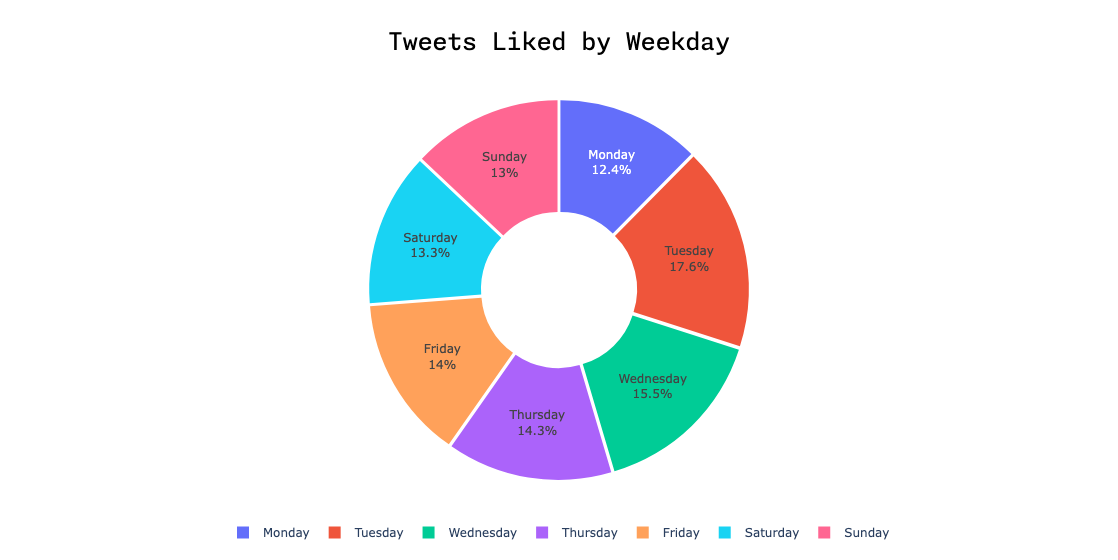

In [252]:
def plot_combined_donut_chart_ordered_correctly(data_df, date_col = 'StrTime'):
    # Convert 'StrTime' to datetime and extract the weekday name and number
    data_df['WeekdayName'] = data_df[date_col].dt.day_name()
    # Map weekday names to numbers for sorting (Monday=0, ..., Sunday=6)
    weekdays_map = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
    data_df['WeekdayNumber'] = data_df['WeekdayName'].map(weekdays_map)
    
    # Prepare the data: count messages by WeekdayName, ignoring sender
    weekday_distribution = data_df.groupby(['WeekdayName', 'WeekdayNumber']).size().reset_index(name='Count')
    
    # Sort by WeekdayNumber to ensure correct order
    weekday_distribution.sort_values('WeekdayNumber', inplace=True)
    
    # Now that sorting is done, WeekdayNumber is no longer needed
    weekday_distribution = weekday_distribution.drop(columns=['WeekdayNumber'])
    
    # Create Donut chart with a different color scheme
    fig = px.pie(weekday_distribution, names='WeekdayName', values='Count',
                 title="Tweets Liked by Weekday",
                 color_discrete_sequence=px.colors.qualitative.Plotly,
                 hole=0.4)
    
    # Add slight margin between each day for better visualization
    fig.update_traces(textinfo='percent+label', pull=0.02)
    fig.update_layout(height=560, title_x=0.5, title_font = dict(size=24, family="MonaspaceNeon-Regular", color="black"), legend=dict(
    orientation="h", xanchor="center", x=0.5))
    fig.update_traces(sort=False, direction='clockwise')

    fig.show()

# Ensure data_df['StrTime'] is a datetime column before calling the function
plot_combined_donut_chart_ordered_correctly(df, date_col='date')

/Users/jerlin/anaconda3/lib/python3.11/site-packages/plotly_calplot/calplot.py:159: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



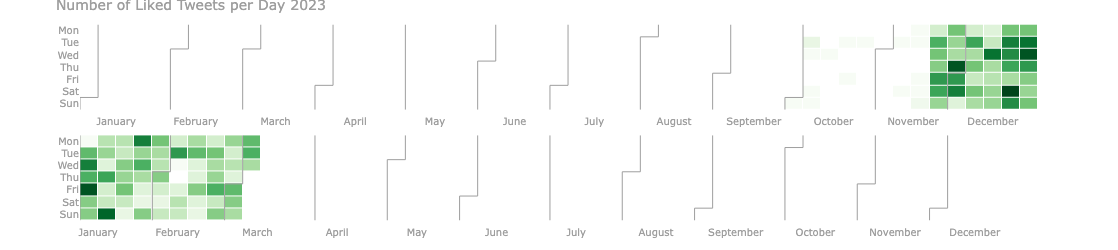

In [253]:
from plotly_calplot import calplot

def convert_to_day_df(df):
    # Convert the 'date' column to datetime if it's not already
    df['date'] = pd.to_datetime(df['date'])
    day_df = df.groupby(df['date'].dt.date).size().reset_index(name='num_tweets')
    
    return day_df

day_df = convert_to_day_df(df)
day_df.head(2)

fig = calplot(day_df[(day_df['date'].astype(str)>'2023-09-01') & (day_df['date'].astype(str) < '2024-03-07')], x="date", y="num_tweets", 
              start_month = 1,
    end_month = 12,
    )

# set height of the figure
fig.update_layout(height=250)
# add title 
fig.update_layout(title='Number of Liked Tweets per Day 2023')
fig.show()

## Image captions 
Proof of concept: get high level summary, detailed description and tags for first image from liked tweets. 


With GPT-4-V. 

Gemini 1.0 also works pretty great for this usecase.

Mainly, convert image to structured json data. 

In [267]:
import google.generativeai as genai
import replicate
import os 
import json
from IPython.display import Image, display
import PIL.Image
from PIL import Image
import urllib.request 

# 配置 genai 使用环境变量中的 API KEY
api_key = os.getenv('GEMINI_API_KEY')
if not api_key:
    print("GEMINI_API_KEY environment variable not set.")
    sys.exit(1)

genai.configure(api_key=api_key)

# Set up the model
generation_config = {"temperature": 0.9, "top_p": 0.9, "top_k": 40, "max_output_tokens": 2048}

# 从环境变量中获取 API KEY
API_KEY = os.getenv('REPLICATE_API_TOKEN')

# 配置Replicate客户端使用API KEY
replicate_client = replicate.Client(api_token=API_KEY)

# 构建 prompt
prompt_parts = [
  "You will be given a JSON string (that may not be completely valid), your task is to create a valid JSON results based on the input. Try keep the structure of the input JSON as much as possible.",
]

model = genai.GenerativeModel(model_name="gemini-1.0-pro-001", generation_config=generation_config)

def get_valid_json_with_gemini(input):
    response = model.generate_content(prompt_parts)
    # 提取 response 中的 text
    if hasattr(response, 'candidates'):
        for candidate in response.candidates:
            if hasattr(candidate, 'content') and hasattr(candidate.content, 'parts'):
                for part in candidate.content.parts:
                    return part.text
                    print(part.text)

def get_tweet_image_captioning(image_url, author_name, text):
    # Opening the image for Image Understanding
    urllib.request.urlretrieve(image_url, "images/input.png") 
    image = PIL.Image.open('images/input.png')

        # 构建提示，结合了文本和图像
    prompt_parts = [
    f""" This is a tweet from {author_name}, 
    with the following text:
    {text}.

    Below is an image from the tweet.
    Your task is to caption the image and provide a description. reference the text or author if necessary. 

    Output rules you MUST follow:
    - "Summary": A brief high level, big picture description of the image. What is this and what is this for?
    - "Description": A detailed description of the image. If there are text in the image, please include all of it in the description. (in its original language)
    - "Tags": a brief list of high level tags that describe the image. (e.g. "cat", "anime girl", "food")

    Return results in a JSON format (with "Answer" as key, contains list of  dictionary with exactly these key names):    
""",
      image
    ]

    model = genai.GenerativeModel(model_name="gemini-pro-vision", generation_config=generation_config)
    response = model.generate_content(prompt_parts)
    # 提取 response 中的 text
    if hasattr(response, 'candidates'):
        for candidate in response.candidates:
            if hasattr(candidate, 'content') and hasattr(candidate.content, 'parts'):
                for part in candidate.content.parts:
                    return part.text
                    print(part.text)

    # Post process the response with gemini json mode
    json_captions = get_valid_json_with_gemini(text)
    return json_captions

In [ ]:
替换成 Replica 的 LlaVa
"""
def get_tweet_image_captioning(image_url, author_name, text):
    image_prompt = f""" 
    This is a tweet from {author_name}, 
    with the following text:
    {text}.

    Below is an image from the tweet.
    Your task is to caption the image and provide a description. reference the text or author if necessary. 

    Output rules you MUST follow:
    - "Summary": A brief high level, big picture description of the image. What is this and what is this for?
    - "Description": A detailed description of the image. If there are text in the image, please include all of it in the description. (in its original language)
    - "Tags": a brief list of high level tags that describe the image. (e.g. "cat", "anime girl", "food")

    Return results in a JSON format (with "Answer" as key, contains list of  dictionary with exactly these key names):    
"""
    output = replicate.run(
        "yorickvp/llava-v1.6-34b:41ecfbfb261e6c1adf3ad896c9066ca98346996d7c4045c5bc944a79d430f174",   
        input={
            "image": image_url,
            "temperature": 0.8,
            "top_p": 0.9,
            "top_k": 10,
            "prompt": image_prompt,
            "history": [],
            "max_tokens": 1024
        }
    )
    
    for item in output:
        print(item)
        return item

    # Post process the response with gemini json mode
    json_captions = get_valid_json_with_gemini(text)
    return json_captions
"""    

In [268]:
sample_image_df = df[df.media_type=='Image'].head(30)
sample_image_urls = sample_image_df.images_urls.tolist()
sample_authors = sample_image_df.author_name.tolist()
sample_texts = sample_image_df.text.tolist()

In [269]:
import PIL.Image
from IPython.display import Image, display

cur_idx = 26
image_url = sample_image_urls[cur_idx][0]
author_name = sample_authors[cur_idx]
text = sample_texts[cur_idx]

display(Image(url=image_url))

In [270]:
print(f"Image url: {image_url}\n"
      f"Author name: {author_name}\n"
      f"Text: {text}"   )

result = get_tweet_image_captioning(image_url, author_name, text)

Image url: https://pbs.twimg.com/media/GHy9ZhmaoAA24mJ?format=jpg&name=medium
Author name: ばむ
Text: セクシーなのキュートなの
どっちが好きなの〜？


In [258]:
print(result)

 ```json
{
  "Answer": [
    {
      "Summary": "A photo of a woman in a revealing cheongsam.",
      "Description": "The woman is kneeling on the ground with her hands on her knees. She is wearing a blue and green cheongsam with a very low neckline and a high slit, showing off her cleavage and thighs. Her hair is long and black, and she is wearing a pearl necklace and earrings. She has a seductive expression on her face and is looking at the camera.",
      "Tags": ["woman", "cheongsam", "sexy", "cleavage", "thighs"]
    }
  ]
}
```


In [259]:
import pandas as pd

result_str = result

# 数据预处理：移除可能导致解析错误的字符
result_str_clean = result_str.strip().strip('```')  # 首先去除字符串两端的空白字符，然后去除首尾的```
result_str_clean = result_str_clean.replace('json\n', '')  # 移除json字符及后面的换行符

# 解析JSON
data = json.loads(result_str_clean)

answers = data['Answer']

df = pd.DataFrame(answers, columns=['Summary', 'Description', 'Tags'])

# 设置显示选项以允许长文本自动换行
pd.set_option('display.max_colwidth', None)  # None 表示自动调整列宽以适应内容

# 这里直接应用样式设置，确保文本自动换行
# 隐藏默认索引
df_styled = df.style.set_properties(**{'text-align': 'left', 'white-space': 'pre-wrap'}).hide_index()

df_styled

/var/folders/7s/pwtjw5yx6cng0_cqs3j44_4w0000gn/T/ipykernel_62210/3040141009.py:21: FutureWarning:

this method is deprecated in favour of `Styler.hide(axis="index")`



Summary,Description,Tags
A photo of a woman in a revealing cheongsam.,"The woman is kneeling on the ground with her hands on her knees. She is wearing a blue and green cheongsam with a very low neckline and a high slit, showing off her cleavage and thighs. Her hair is long and black, and she is wearing a pearl necklace and earrings. She has a seductive expression on her face and is looking at the camera.","['woman', 'cheongsam', 'sexy', 'cleavage', 'thighs']"
